# Finance project



In [25]:
import pandas as pd
import datetime as dt
import os
from pandas_datareader import data, wb


# we use [1] as the second table shows the data we require
df2 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]
print(df2.head(50))

                       Company Name         Symbol                  Sector
0                       Adani Ports  ADANIPORTS.NS          Infrastructure
1                      Asian Paints  ASIANPAINT.NS          Consumer Goods
2                         Axis Bank    AXISBANK.NS                 Banking
3                        Bajaj Auto  BAJAJ-AUTO.NS              Automobile
4                     Bajaj Finance  BAJFINANCE.NS      Financial Services
5                     Bajaj Finserv  BAJAJFINSV.NS      Financial Services
6                     Bharti Airtel  BHARTIARTL.NS       Telecommunication
7                  Bharat Petroleum        BPCL.NS      Energy - Oil & Gas
8              Britannia Industries   BRITANNIA.NS          Consumer Goods
9                             Cipla       CIPLA.NS         Pharmaceuticals
10                       Coal India   COALINDIA.NS         Energy & Mining
11              Divi's Laboratories    DIVISLAB.NS         Pharmaceuticals
12         Dr. Reddy's La

In [24]:
import pandas as pd
import datetime as dt
import os
from pandas_datareader import data, wb


# read_html() imports a list of dataframes (there could be multiple tables in an HTML source),
# get the desired one by index. In your case, there is a single dataframe:
# using df = table[0]
table=pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')
df = table[1]

# converting the given dataframe into a csv file
df.to_csv('NIFTY-Info.csv')

# converting the given data and using specific parameter columns to import the list of companies without the data
df.to_csv("NIFTY-Symbols.csv", columns=['Symbol'])

# Reset the index, or a level of it.
# Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, 
# this method can remove one or more levels.
df1=pd.read_csv('C:/Users/utk15/NIFTY-Symbols.csv')
df1.reset_index(inplace=True)

In [12]:
import datetime as dt
from matplotlib import pylab as pb
from matplotlib import pyplot as pt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
#background style of pyplot
pt.style.use('dark_background')

#We would like all available data from // until //
start_date = '2018-01-01'
end_date = '2019-01-01'


#User pandas_datareader to load the desired data
df = data.get_data_yahoo('RELIANCE.NS', start_date, end_date)
df.to_csv(' RELIANCE.NS.csv')

                  open        high         low       close
Date                                                      
2018-01-01  393.092071  416.845764  390.878998  416.501556
2018-01-11  418.517914  426.337463  409.419708  426.337463
2018-01-21  430.861969  441.386383  421.222778  421.222778
2018-01-31  421.812958  421.812958  392.452759  392.452759
2018-02-10  396.731384  406.223023  387.387268  387.387268


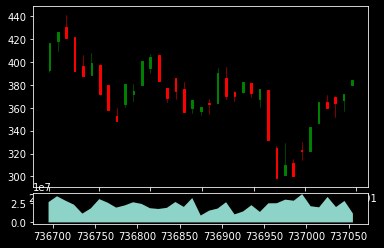

In [27]:
import datetime as dt
from matplotlib import pylab as pb
from matplotlib import pyplot as pt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
#background style of pyplot
pt.style.use('dark_background')

#reading the desired data
df1=pd.read_csv('C:/Users/utk15/ADANIPORTS.NS.csv',parse_dates=True,index_col=0)




# The idea of a simple moving average is to take a window of time, and calculate the average price in 
# that window. Then we shift that window over one period, and do it again. In our case, 
# we'll do a 100 day rolling moving average. So this will take the current price, and the prices 
# from the past 99 days, add them up, divide by 100, and there's your current 100-day moving average. 

df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()

# An open-high-low-close chart (also OHLC) is a type of chart typically used to illustrate movements
# in the price of a financial instrument over time
# The resample() function is used to resample time-series data.
# Convenience method for frequency conversion and resampling of time series.
# Object must have a datetime-like index 
df1_ohlc=df1['Adj Close'].resample('10D').ohlc()
df1_volume=df1['Volume'].resample('10D').sum()


print(df1_ohlc.head())

# date2num	Convert datetime objects to Matplotlib dates.
# num2date	Convert Matplotlib dates to datetime objects.
df1_ohlc.reset_index(inplace=True)
df1_ohlc['Date']=df1_ohlc['Date'].map(mdates.date2num)


# subplotting
ax1=pt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=pt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1)
ax1.xaxis_date()

# plotting the candlestick graph
candlestick_ohlc(ax1,df1_ohlc.values,width=2,colorup='g')
ax2.fill_between(df1_volume.index.map(mdates.date2num),df1_volume.values,0)
pt.show()


In [12]:
import pandas as pd
import pandas as pd
from pandas_datareader import data as web
import datetime
df = pd.read_csv('NIFTY-Symbols.csv')

for row in df.iterrows():

    print (row)


(0, Unnamed: 0                0
Symbol        ADANIPORTS.NS
Name: 0, dtype: object)
(1, Unnamed: 0                1
Symbol        ASIANPAINT.NS
Name: 1, dtype: object)
(2, Unnamed: 0              2
Symbol        AXISBANK.NS
Name: 2, dtype: object)
(3, Unnamed: 0                3
Symbol        BAJAJ-AUTO.NS
Name: 3, dtype: object)
(4, Unnamed: 0                4
Symbol        BAJFINANCE.NS
Name: 4, dtype: object)
(5, Unnamed: 0                5
Symbol        BAJAJFINSV.NS
Name: 5, dtype: object)
(6, Unnamed: 0                6
Symbol        BHARTIARTL.NS
Name: 6, dtype: object)
(7, Unnamed: 0          7
Symbol        BPCL.NS
Name: 7, dtype: object)
(8, Unnamed: 0               8
Symbol        BRITANNIA.NS
Name: 8, dtype: object)
(9, Unnamed: 0           9
Symbol        CIPLA.NS
Name: 9, dtype: object)
(10, Unnamed: 0              10
Symbol        COALINDIA.NS
Name: 10, dtype: object)
(11, Unnamed: 0             11
Symbol        DIVISLAB.NS
Name: 11, dtype: object)
(12, Unnamed: 0       

In [23]:
import pandas as pd
from pandas_datareader import data as web
import datetime


start = datetime.date(2020,10,10)
end = datetime.date.today()
df = pd.read_csv('NIFTY-Symbols.csv')
t = df['Symbol'].values.tolist()
df2 = web.DataReader(t, 'yahoo', start, end)
# df2.to_csv('file_name3.csv')


In [28]:
import pandas as pd
df=pd.read_csv('file_name3.csv')
print(df['Date'].head())

0          NaN
1    12-Oct-20
2    13-Oct-20
3    14-Oct-20
4    15-Oct-20
Name: Date, dtype: object


In [29]:
import pandas as pd
from pandas_datareader import data as web
import datetime
from matplotlib import pylab as pb
from matplotlib import pyplot as pt

pt.style.use('dark_background')

# comparing 2 or more companies over the same time frame 
# using the data extracted from S&P500 companies symbol list
fields = ['ASIANPAINT.NS', 'DRREDDY.NS', 'Date']

df = pd.read_csv('file_name3.csv', skipinitialspace=True, usecols=fields)
df.dropna(inplace=True)

# correlation between 2 or more companies
df_corr=df.corr()
print(df.head())
print(df_corr.head())


        Date  ASIANPAINT.NS   DRREDDY.NS
1  12-Oct-20    2077.850098  5220.500000
2  13-Oct-20    2064.649902  5168.750000
3  14-Oct-20    2071.350098  5123.000000
4  15-Oct-20    2090.449951  5056.250000
5  16-Oct-20    2061.199951  5080.549805
               ASIANPAINT.NS  DRREDDY.NS
ASIANPAINT.NS       1.000000   -0.574611
DRREDDY.NS         -0.574611    1.000000


In [30]:
from pandas_datareader import data
from matplotlib import pyplot 
# Only get the adjusted close.
asianpaints = data.DataReader("ASIANPAINT.NS", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')['Adj Close']

# Convert the adjusted closing prices to cumulative returns.

returns = asianpaints.pct_change()

print(returns.head())
    

# Convert the adjusted closing prices to cumulative returns multiple companies     
from datetime import datetime
import pandas_datareader.data as wb

stocklist = ['ASIANPAINT.NS','DRREDDY.NS','TATASTEEL.NS','CIPLA.NS']

start = datetime(2016,6,8)
end = datetime(2016,6,11)

p = wb.DataReader(stocklist, 'yahoo',start,end)
df.dropna(inplace=True)
q=p.pct_change()
print(q.head())


Date
2015-01-01         NaN
2015-01-02    0.034573
2015-01-05   -0.000064
2015-01-06   -0.023871
2015-01-07    0.020093
Name: Adj Close, dtype: float64
Attributes     Adj Close                                           Close  \
Symbols    ASIANPAINT.NS DRREDDY.NS TATASTEEL.NS  CIPLA.NS ASIANPAINT.NS   
Date                                                                       
2016-06-08           NaN        NaN          NaN       NaN           NaN   
2016-06-09     -0.018909  -0.021351     0.001610  0.014720     -0.018909   
2016-06-10     -0.006758  -0.001677    -0.022367 -0.005531     -0.006758   

Attributes                                            High             ...  \
Symbols    DRREDDY.NS TATASTEEL.NS  CIPLA.NS ASIANPAINT.NS DRREDDY.NS  ...   
Date                                                                   ...   
2016-06-08        NaN          NaN       NaN           NaN        NaN  ...   
2016-06-09  -0.021352     0.001611  0.014720     -0.009718  -0.021101  ...   
2

In [31]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

# each model is gonna be on per company basis but
# each company is going to take into account of pricing of data of all the other sandp500 comp



def process_data_for_labels(ticker):
    hm_days = 4
    df = pd.read_csv('file_name3.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
  
# custom dataframe which will give us the % change in stock value by shifting the list to get future data value
# (future data value-present data value)/present data val will give us the %/100 change
    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df
process_data_for_labels('TATASTEEL.NS')

(['ADANIPORTS.NS',
  'ASIANPAINT.NS',
  'AXISBANK.NS',
  'BAJAJ-AUTO.NS',
  'BAJFINANCE.NS',
  'BAJAJFINSV.NS',
  'BHARTIARTL.NS',
  'BPCL.NS',
  'BRITANNIA.NS',
  'CIPLA.NS',
  'COALINDIA.NS',
  'DRREDDY.NS',
  'EICHERMOT.NS',
  'GAIL.NS',
  'GRASIM.NS',
  'HCLTECH.NS',
  'HDFC.NS',
  'HDFCBANK.NS',
  'HDFCLIFE.NS',
  'HEROMOTOCO.NS',
  'HINDALCO.NS',
  'HINDUNILVR.NS',
  'ICICIBANK.NS',
  'INDUSINDBK.NS',
  'INFY.NS',
  'IOC.NS',
  'ITC.NS',
  'JSWSTEEL.NS',
  'KOTAKBANK.NS',
  'LT.NS',
  'M&M.NS',
  'MARUTI.NS',
  'NESTLEIND.NS',
  'NTPC.NS',
  'ONGC.NS',
  'POWERGRID.NS',
  'RELIANCE.NS',
  'SBIN.NS',
  'SBILIFE.NS',
  'SHREECEM.NS',
  'SUNPHARMA.NS',
  'TATAMOTORS.NS',
  'TATASTEEL.NS',
  'TCS.NS',
  'TECHM.NS',
  'TITAN.NS',
  'ULTRACEMCO.NS',
  'UPL.NS',
  'WIPRO.NS',
  'DIVISLAB.NS',
  'ADANIPORTS.NS.1',
  'ASIANPAINT.NS.1',
  'AXISBANK.NS.1',
  'BAJAJ-AUTO.NS.1',
  'BAJFINANCE.NS.1',
  'BAJAJFINSV.NS.1',
  'BHARTIARTL.NS.1',
  'BPCL.NS.1',
  'BRITANNIA.NS.1',
  'CIPLA.NS.1',
 

In [44]:
import pandas as pd
import quandl
import math

df=pd.read_csv('ADANIPORTS.NS.csv')

# recreated our datadrame just to be the open high low close volume of the ajdusted one
# there is some sorta relationship btw these columns
# like high and low tell us bout the volatility of the stock

df=df[['Open','High','Low','Adj Close','Volume']]

df['hl_pct']=(df['High']-df['Low']) / df['Low'] * 100
df['pct_change']=(df['Adj Close']-df['Open']) / df['Open'] * 100


# now we define the only columns that we actually care about

df=df[['Adj Close','hl_pct','pct_change','Volume']]

print(df.head())

forecast_col='Adj Close'
df.fillna(-99999,inplace=True)

# math ceil rounds up the decimal value to the nearest whole number
# 0.1 here means we are going to predict 10% of the dataframe , using data that came out 10 days ago to predict todays
# slly 0.01 means we need to predict only a day afters price
forecast_out=int(math.ceil(0.01*len(df)))

df['label']=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
df.to_csv('file_name6.csv')

    Adj Close    hl_pct  pct_change   Volume
0  393.092071  2.424325   -3.345941  2701537
1  390.878998  2.139244   -3.115879  1322980
2  400.960785  3.384069    0.718608  4679468
3  403.124725  1.145185   -1.364151  1990506
4  416.845764  4.083374    1.200721  5448214


In [33]:
import pandas as pd
import quandl , math
import 

df=pd.read_csv('ADANIPORTS.NS.csv')

# recreated our datadrame just to be the open high low close volume of the ajdusted one
# there is some sorta relationship btw these columns
# like high and low tell us bout the volatility of the stock

df=df[['Open','High','Low','Adj Close','Volume']]

df['hl_pct']=(df['High']-df['Low']) / df['Low'] * 100
df['pct_change']=(df['Adj Close']-df['Open']) / df['Open'] * 100


# now we define the only columns that we actually care about

df=df[['Adj Close','hl_pct','pct_change','Volume']]

print(df.head())

forecast_col='Adj Close'
df.fillna(-99999,inplace=True)

# math ceil rounds up the decimal value to the nearest whole number
# 0.1 here means we are going to predict 10% of the dataframe , using data that came out 10 days ago to predict todays
# slly 0.01 means we need to predict only a day afters price
forecast_out=int(math.ceil(0.01*len(df)))

df['label']=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

In [13]:
# we use preprocessing for scaling
# we use model selection for splitting and rearranging the data so that we do not have a biased sample set
# svm for regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import quandl , math
from sklearn import preprocessing , model_selection , svm
import numpy as np

df=pd.read_csv('ADANIPORTS.NS.csv')

# recreated our datadrame just to be the open high low close volume of the ajdusted one
# there is some sorta relationship btw these columns
# like high and low tell us bout the volatility of the stock

df=df[['Open','High','Low','Adj Close','Volume']]

df['hl_pct']=(df['High']-df['Low']) / df['Low'] * 100
df['pct_change']=(df['Adj Close']-df['Open']) / df['Open'] * 100


# now we define the only columns that we actually care about

df=df[['Adj Close','hl_pct','pct_change','Volume']]

# print(df.head())

forecast_col='Adj Close'
df.fillna(-99999,inplace=True)

# math ceil rounds up the decimal value to the nearest whole number
# 0.1 here means we are going to predict 10% of the dataframe , using data that came out 10 days ago to predict todays
# slly 0.01 means we need to predict only a day afters price
forecast_out=int(math.ceil(0.01*len(df)))

df['label']=df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

# features(capital x) and labels(lowercase y)

# here feauters are everything exept label
X=np.array(df.drop(['label'],1))
y=np.array(df['label'])

# scaling x before we feed it to classifier

X=preprocessing.scale(X)
df.dropna(inplace=True)
y=np.array(df['label'])

# gonna take all our features and labels and shuffle them up and give output
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# use n_jobs for faster training of model or how many jobs we are willing to run at a time
# -1=max by ur processor
# significantly faster training
clf=LinearRegression(n_jobs=10)

# training a classifier
clf.fit(X_train,y_train)

# testing the accuracy
accuracy =clf.score(X_test,y_test)
print(accuracy)

0.8834455265075698


In [36]:
import pandas as pd
import quandl
import math
import datetime as dt
from matplotlib import pylab as pb
from matplotlib import pyplot as pt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
#background style of pyplot
pt.style.use('dark_background')

#reading the desired data
df1=pd.read_csv('C:/Users/utk15/ADANIPORTS.NS.csv',parse_dates=True,index_col=0)
print(df1.head())

# learning to create columns with shift
# price1= close price of tmrw - close price of today

df1['price1']=df1['Close'].shift(-1)
print(df1['Close'].head())
print(df1['price1'].head())

# learning to add dircetions
# return = price1/close
df1['pricediff']=df1['price1'] - df1['Close']
df1['return']=df1['pricediff']/df1['Close']
# 1 if >0
# -1 if <0

# It says it will give value 1 for Direction if PriceDiff is positive. Otherwise, it is negative. 
# The yellow part defines the domain in which this operation will be performed. ei is a name 
# for any Index of fb. It means for any index ei, Direction will be valued according to the condition
# defined in the red region.

df1['direction']=[1 if df1.loc[ei,'return'] > 0 else -1 for ei in df1.index]

pd.set_option("display.max_columns", 200)
print(df1.head())

             Adj Close  ...
Date                    ...
2018-01-01  393.092071  ...
2018-01-02  390.878998  ...
2018-01-03  400.960785  ...
2018-01-04  403.124725  ...
2018-01-05  416.845764  ...

[5 rows x 6 columns]
Date
2018-01-01    399.649994
2018-01-02    397.399994
2018-01-03    407.649994
2018-01-04    409.850006
2018-01-05    423.799988
Name: Close, dtype: float64
Date
2018-01-01    397.399994
2018-01-02    407.649994
2018-01-03    409.850006
2018-01-04    423.799988
2018-01-05    422.899994
Name: price1, dtype: float64
             Adj Close         Low        Open       Close   Volume  \
Date                                                                  
2018-01-01  393.092071  398.049988  406.700012  399.649994  2701537   
2018-01-02  390.878998  395.000000  403.450012  397.399994  1322980   
2018-01-03  400.960785  397.450012  398.100006  407.649994  4679468   
2018-01-04  403.124725  406.049988  408.700012  409.850006  1990506   
2018-01-05  416.845764  410.200012  411

             Adj Close         Low        Open       Close   Volume  \
Date                                                                  
2018-01-01  393.092071  398.049988  406.700012  399.649994  2701537   
2018-01-02  390.878998  395.000000  403.450012  397.399994  1322980   
2018-01-03  400.960785  397.450012  398.100006  407.649994  4679468   
2018-01-04  403.124725  406.049988  408.700012  409.850006  1990506   
2018-01-05  416.845764  410.200012  411.899994  423.799988  5448214   

                  High  
Date                    
2018-01-01  407.700012  
2018-01-02  403.450012  
2018-01-03  410.899994  
2018-01-04  410.700012  
2018-01-05  426.950012  
total money you win is 45.49999999999994
total money you spent is 399.64999389999997


Text(0.5, 1.0, 'Total money you win is 45.49999999999994')

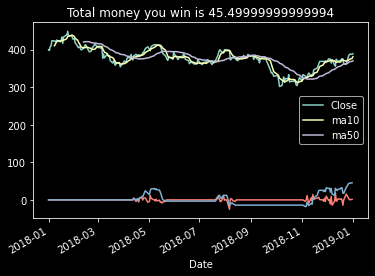

In [5]:
# TRADING STRAT 1

import pandas as pd
import quandl
import math
import datetime as dt
from matplotlib import pylab as pb
from matplotlib import pyplot as pt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

#background style of pyplot
pt.style.use('dark_background')

#reading the desired data
df=pd.read_csv('ADANIPORTS.NS.csv',parse_dates=True,index_col=0)
print(df.head())

# ma10=mov avg over a short period also known as fast signal
# ma50=mov avg over a long period also known as slow signal
df['ma10']=df['Close'].rolling(6).mean()
df['ma50']=df['Close'].rolling(30).mean()

# plotting slow signal fast signal and closing price
df['Close'].plot(legend=True)
df['ma10'].plot(legend=True)
df['ma50'].plot(legend=True)
# pb.fill_between('ma10','ma50',alpha=0.57,y2='ma50',where=('ma10'>'ma50'),interpolate=True,color='g',label='Above , so long')
# pb.fill_between('ma10','ma50',alpha=0.57,y2='ma50',where=('ma10'<='ma50'),interpolate=True,label='Below')

# if ma10>ma50 then buy and hold one share of stock
# We can create a new variable called shares, to denote whether we long or not. It is created using
# list comprehension. Shares is equal to 1 if MA10 is larger than MA50, otherwise it is zero.

df['shares']=[ 1 if df.loc[ei,'ma10']>df.loc[ei,'ma50'] else 0 for ei in df.index]

# create a new variable called Profit, which indeed is the daily profit. If shares is equal to one, the daily profit is equal to the close price of tomorrow minus close
# price of today
# we create variable Close1, which is the close price of tomorrow.

df['close1']=df['Close'].shift(-1)
df.iloc[500:505,:]

df['profit']=[df.loc[ei,'close1']-df.loc[ei,'Close'] if df.loc[ei,'shares']==1 else 0 for ei in df.index]

# We can plot the profit and find out on some days we make money, on other days we lose money.

df['profit'].plot()
# pt.axhile(y=0,color='red')

# Cumsum to compute cumulative sum and create a new variable Wealth

df['wealth']=df['profit'].cumsum()
df.tail()

print('total money you win is', df.loc[df.index[-2],'wealth'])
print('total money you spent is', df.loc[df.index[0],'Close'])
df['wealth'].plot()
pt.title('Total money you win is {}'.format(df.loc[df.index[-2], 'wealth']))





In [ ]:
#to get max price of smthin using a function

import pandas as pd
def test_run():
    """Function called by Test Run."""
    df = pd.read_csv("aapl.csv")
    print(df['Volume'].max())
    
test_run()

In [22]:
import pandas as pd
import datetime as dt
import os
from pandas_datareader import data, wb


# we use [1] as the second table shows the data we require
df = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]

# converting the given dataframe into a csv file
# df.to_csv('NIFTY-Info.csv')

# converting the given data and using specific parameter columns to import the list of companies without the data
df.to_csv("maxsym.csv", columns=['Symbol'])

def giverecords(Symbol):
    df = pd.read_csv("maxsym.csv".format(Symbol))
    start_date = '2018-01-01'
    end_date = '2019-01-01'
    df = data.DataReader(" RELIANCE.NS ", 
                       start='2015-1-1', 
                       end='2015-12-31', 
                       data_source='yahoo')
    return df['Close'].max()
giverecords('Symbol')

#def testrun(Symbol):
    # to give max close of a company by a symbol
 #   df=pd.read_csv(maxsym.csv)
  #  for Symbol in ['RELAINCE.NS']:
   #     print ("max close")
    #    print (Symbol , giverecords(Symbol))

#testrun('RELAINCE.NS')
    


RemoteDataError: No data fetched for symbol  RELIANCE.NS  using YahooDailyReader

In [25]:
import pandas as pd
from pandas_datareader import data as web
import datetime
from matplotlib import pylab as pb
from matplotlib import pyplot as pt

pt.style.use('dark_background')

# comparing 2 or more companies over the same time frame 
# using the data extracted from S&P500 companies symbol list
fields = ['ASIANPAINT.NS']

df = pd.read_csv('file_name3.csv', skipinitialspace=True, usecols=fields)
df.dropna(inplace=True)

# correlation between 2 or more companies
df_corr=df.corr()
print(df.head())
print(df_corr.head())

FileNotFoundError: [Errno 2] No such file or directory: 'sym.csv'

In [26]:
import datetime as dt
from matplotlib import pylab as pb
from matplotlib import pyplot as pt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
#background style of pyplot
pt.style.use('dark_background')

#We would like all available data from // until //
start_date = '2018-01-01'
end_date = '2019-01-01'


#User pandas_datareader to load the desired data
df = data.get_data_yahoo('RELIANCE.NS', start_date, end_date)
df.to_csv(' 1.csv')

ModuleNotFoundError: No module named 'mpl_finance'

In [2]:
import pandas as pd

def get_mean_volume(symbol):
    """Return the mean volume for stock indicated by symbol.
    
    Note: Data for a stock is stored in file: data/<symbol>.csv
    """
    df = pd.read_csv("RELIANCE.NS.csv".format(symbol))  # read in data
    # TODO: Compute and return the mean volume for this stock


def test_run():
    """Function called by Test Run."""
    for symbol in ['RELIANCE']:
        print ("Mean Volume")
        print (symbol, get_mean_volume(symbol))
        
if __name__ == "__main__":
    test_run()

Mean Volume
RELIANCE None
